<a href="https://colab.research.google.com/github/armandordorica/Portfolio_Optimization/blob/master/Session6_Regression_Channel_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
cd drive/My\ Drive/u\ of\ t/APS\ 1051\ Portfolio\ Optimization/

/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization


In [7]:
cd Session\ 6

/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization/Session 6


In [9]:
cd  REGRESSIONCHANNELSINGLEASSETPROGRAMS

/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization/Session 6/REGRESSIONCHANNELSINGLEASSETPROGRAMS


In [11]:
cd 1.Introduction/

/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization/Session 6/REGRESSIONCHANNELSINGLEASSETPROGRAMS/1.Introduction


In [12]:
ls

CheatSheets/                       RegressionChannelSimple.ipynb
detrendPrice.py                    RegressionChannelSimple.pptx
dfP_RegressionChannelSimple.xlsx   RegressionChannelSimple.py
__pycache__/                       Results/
RegressionChannelSimple_GUIDE.mp3  SPY.csv
RegressionChannelSimple_GUIDE.txt  WhiteRealityCheckFor1.py


In [15]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=6bea0ab5ef4a64fbefbc9b1a04d024bac5f0fb585be6a3251d012527d1f62b85
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [16]:
# -*- coding: utf-8 -*-
"""
see RegressionChannelSimple.pptx and
see dfP_RegressionChannelSimple.xlsx
see RegressionChannelSimple_GUIDE.txt
see see RegressionChannelSimple_GUIDE.mp3

"""

import detrendPrice #you can ignore this for now
import WhiteRealityCheckFor1 #you can ignore this for now
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like #datareader problem probably fixed in next version of datareader
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override() # <== that's all it takes :-)

start_date = '2000-01-01' 
end_date = '2018-12-31' 
#end_date = datetime.now() 


* The `entryZscore` defines where we are going to go long or short.
* The `exitZscore` defines where we are going to exit the position by reversing what we did previously.
  * We are setting the `entryZscore` not at 2 (for 2 standard deviations away from the mean) but at 0.5, meaning, we are going to take long and short positions rather more frequently.
* The window defines what the lookback is for the calculation of the mean and the standard deviation of the price.
* It is better to use short windows in this strategy, so a 3-week window is sufficient (remember that a trading week is just 5 days).
The variable `shorts` defines if we are going to ever take short positions, and we are setting it to zero, so only long positions will be possible.
* The `delay` controls whether we are going to wait until the next day to execute a signal, we are setting this to 1, so no waiting will take place.
* `tcost` sets a transaction cost, here we set it to zero, so no transactions costs are considered.

In [17]:


symbol = 'SPY' 
entryZscore = .5 # gauge of regression channel
exitZscore = -.0
window = 25 #lookback for moving average
shorts = 0 #shorts possible or not
delay = 1 #1 for instant execution, 2 for one day delay
tcost=10/10000*0



In [18]:

msg = "" 
address = symbol + '.csv'
  

try:
    dfP = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)
    dfP.to_csv(address, header = True, index=True, encoding='utf-8')
except Exception:
    msg = "yahoo problem"
    dfP = pd.DataFrame()


[*********************100%***********************]  1 of 1 completed


### Reading and storing the data into a well-formed data frame

In [19]:

dfP = pd.read_csv(address, parse_dates=['Date'])
dfP = dfP.sort_values(by='Date')
dfP.set_index('Date', inplace = True)


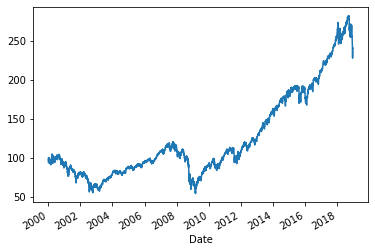

In [21]:
dfP['Adj Close'].plot()
plt.show()


### Data pre-processing

In [23]:

dfP = dfP.assign(LOG_ADJ_CLOSE = np.log(dfP['Adj Close'])) 
#dfP['LOG_ADJ_CLOSE']= np.log(dfP['Adj Close']) another way of doing the same thing
#dfP.LOG_ADJ_CLOSE = np.log(dfP['Adj Close']) another way of doing the same thing? won't work


### Signal Engineering
**Calculating the Bollinger bands**
* Mean band - "mean" 
* Upper band - "U-B" 
* Lower band - "L-B"

In [29]:

mean = dfP['LOG_ADJ_CLOSE'].rolling(window=window).mean()

std_dev = dfP['LOG_ADJ_CLOSE'].rolling(window=window).std()

dfP['zScore'] = (dfP['LOG_ADJ_CLOSE']-mean)/std_dev
dfP['mean'] = mean
dfP['stdev'] = std_dev
dfP['LB'] = mean - entryZscore*std_dev
dfP['UB'] = mean + entryZscore*std_dev

dfP['UpperEntryZscore'] = entryZscore
dfP['LowerEntryZscore'] = entryZscore*-1




* **When setting the `entryZscore` and the `exitZscore` you need to refer to this graph.**
* **The `entryZscore` needs to be reachable by the `zScore`.
If you set the `entryZscore` at 5 standard deviations, the system will never buy or sell.**

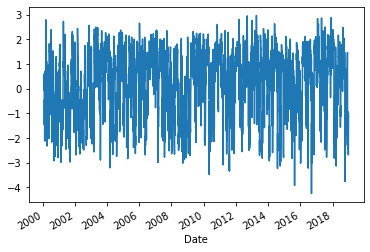

In [30]:
dfP['zScore'].plot()
plt.show()

### **Plotting the Bollinger bands generated by the system**

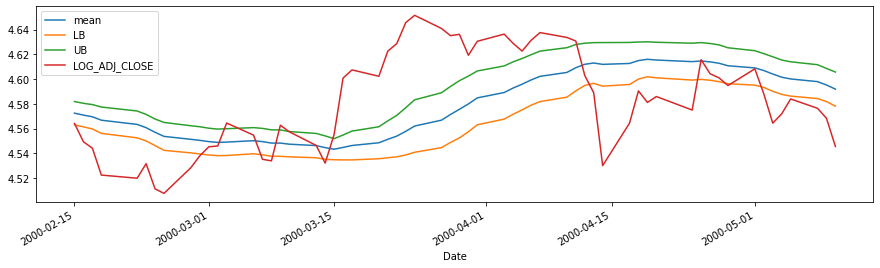

In [31]:

dfP[30:90].plot(y=["mean", "LB", "UB", "LOG_ADJ_CLOSE"], figsize=(15,4))


### **Plotting the Bollinger bands generated by the system in terms of the z-score**

The two plots (this one and the previous) essentially contain the same information and generate the same trading signals.

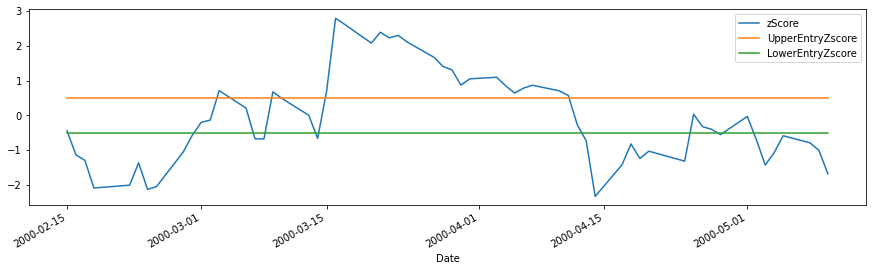

In [32]:
dfP[30:90].plot(y=["zScore", "UpperEntryZscore", "LowerEntryZscore"], figsize=(15,4))


### **Trading rule for Going Long**
* Conditional statement that defines when to buy a contract.

In [33]:

#set up num_units_long  
dfP['long_entry'] = ((dfP.zScore <  -entryZscore))
dfP['long_exit'] = ((dfP.zScore >  -exitZscore))

### **Calculating long contracts**
* Code that keeps track of how many contracts we have bought and are presently holding.

In [34]:
dfP['num_units_long'] = np.nan #it is important to start with nan in this column otherwise padding wont work
dfP.loc[dfP['long_entry'],'num_units_long'] = 1 
dfP.loc[dfP['long_exit'],'num_units_long'] = 0 


dfP.iat[0,dfP.columns.get_loc("num_units_long")]= 0
dfP['num_units_long'] = dfP['num_units_long'].fillna(method='pad') 


### **Calculating short contracts**
* The same goes for the shorts, but we set the parameter for shorts to zero.

In [35]:

#set up num units short 
dfP['short_entry'] = ((dfP.zScore >  entryZscore))
dfP['short_exit'] = ((dfP.zScore <  exitZscore))


dfP['num_units_short'] = np.nan #it is important to start with nan in this column otherwise padding wont work
dfP.loc[dfP['short_entry'],'num_units_short'] = -1 
dfP.loc[dfP['short_exit'],'num_units_short'] = 0

dfP.iat[0,dfP.columns.get_loc("num_units_short")]= 0
dfP['num_units_short'] = dfP['num_units_short'].fillna(method='pad')


### **Calculating the total `num_units` or STANCE**
Here the system accounts for the total of the net number of contracts it holds. This is called the system's stance. 

In [36]:

dfP['stance'] = dfP['num_units_long']*(1-tcost) +  dfP['num_units_short']*shorts*(1-tcost)


### **Cumulative Returns**

In [37]:

#log return calculation & cummulative return
#dfP['log_rets'] = np.log(dfP['Adj Close']/dfP['Adj Close'].shift(1))
#dfP['port_rets'] = dfP['log_rets'] * dfP['stance'].shift(delay) 
#dfP['cum_rets'] = dfP['log_rets'].cumsum() #cumsum is good for log returns only
#dfP['I'] = dfP['cum_rets'] + 1

#pct return calculation & cummulative return
dfP['market_rets'] = (dfP['Adj Close']-dfP['Adj Close'].shift(1))/abs(dfP['Adj Close'].shift(1)) 
dfP['port_rets'] = dfP['market_rets'] * dfP['stance'].shift(delay) 
dfP = dfP.assign(I =np.cumprod(1+dfP['port_rets'])) #this is good for pct return 
dfP = dfP.assign(Market_Returns_Cummul =np.cumprod(1+dfP['market_rets'])) #this is good for pct return 
dfP.iat[0,dfP.columns.get_loc('I')]= 1


### **Plotting and saving the system equity curve (vs market buy and hold)**

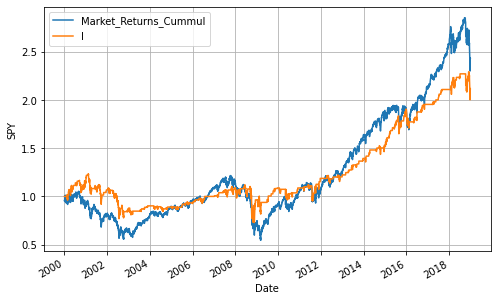

In [39]:

title=symbol
#plt.plot(dfP[['Market_Returns_Cummul','I']])
dfP[['Market_Returns_Cummul','I']].plot(grid=True,figsize=(8,5))
plt.ylabel(symbol)
plt.show()
#plt.savefig(r'Results\%s.png' %(title))
#plt['Close']()


### **Evaluation metrics calculation**

In [40]:
start = 1
start_val = start
end_val = dfP['I'].iat[-1]

start_date = dfP.iloc[0].name
end_date = dfP.iloc[-1].name
days = (end_date - start_date).days    


### **Annual Return**
$$\text{Annual Return} = \frac{\frac{EB-BB}{BB}}{n}$$
Where
* $EB$ = Ending Balance
* $BB$ = Beginning Balance
* $n$ = Number of years

In [42]:

periods = 360 #360 accounting days
trading_periods = 252 #252 trading days

TotaAnnReturn = (end_val-start_val)/start_val/(days/periods)
TotaAnnReturn_trading = (end_val-start_val)/start_val/(days/trading_periods)

years = days/periods
CAGR = ((end_val/start_val)**(1/years))-1
      

### **Compound annual growth rate**
$$\text{CAGR}= \left(\frac{EB}{BB}\right)^{\frac{1}{n}}-1$$

* Compound annual growth rate (CAGR) is the rate of return that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each year of the investment’s lifespan.
* This is the metric that is usually used to measure the return of investment strategies, though it is less intuitive than the total annual return.

### **Sharpe Ratio**
$$\text{Sharpe Ratio}  = \frac{R_p-R_f}{\sigma_p}$$
where 
* $R_p$ = return of the portfolio
* $R_f$ = risk free rate 
* $\sigma_p$ = standard deviation of the portfolio's excess return 

* **The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.**
* Subtracting the risk-free rate from the mean return allows an investor to better isolate the profits associated with risk-taking activities.
* Generally, the greater the value of the Sharpe ratio, the more attractive the risk-adjusted return.
* It is common to simplify to a version of the Sharpe ratio  in terms of the mean of the strategy returns divided by the standard deviation of the strategy returns corrected by multiplying this ratio by an annualization factor.
* The annualization factor is the square root of the period, where the period is the number of days in a year (assuming the returns are daily returns)
* If the returns are monthly returns, the period needs to be 12.

TotaAnnReturn in percent = 5.797812
CAGR in percent = 3.969954
Sharpe Ratio = 0.400000
average return 0.000484
[-0.00065752  0.0006828 ]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.07499999999999996


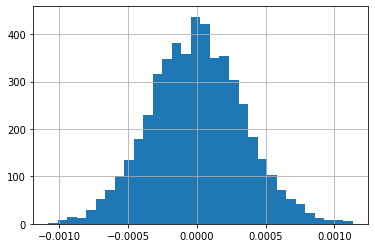

In [43]:
 
try:
    sharpe =  (dfP['port_rets'].mean()/ (dfP['port_rets'].std()) * np.sqrt(periods))
except ZeroDivisionError:
    sharpe = 0.0

print ("TotaAnnReturn in percent = %f" %(TotaAnnReturn*100))
print ("CAGR in percent = %f" %(CAGR*100))
print ("Sharpe Ratio = %f" %(round(sharpe,2)))

#white reality check
#Detrending Prices and Returns and white reality check
dfP['Det_Adj_Close'] = detrendPrice.detrendPrice(dfP['Adj Close']).values #you can ignore this fornow
dfP['Det_pct_ch'] = (dfP['Det_Adj_Close']-dfP['Det_Adj_Close'].shift(1))/abs(dfP['Det_Adj_Close'].shift(1)) #you can ignore this fornow
dfP['Det_port_rets'] = dfP['Det_pct_ch'] * dfP['stance'].shift(delay) #you can ignore this for now
WhiteRealityCheckFor1.bootstrap(dfP['Det_port_rets'])#you can ignore this fornow

    
dfP.to_csv(r'Results\dfP_Simple.csv', header = True, index=True, encoding='utf-8')



### **White's reality check**
* The `p-value` needs to be low, preferable less than .10; otherwise,
one could interpret that the good average returns of a system occurred by chance.